In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\budchris\anaconda3\envs\pythonadv\lib\site-packages (0.0)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# import csv to df
salary_df1 = pd.read_csv("../exported_data/salary_data1.csv")

del salary_df1["Unnamed: 0"]
salary_df1 = salary_df1.dropna()
salary_df1.head()

,id,salaryusd,country,primarydatabase,yearswiththisdatabase,employmentstatus,jobtitle,managestaff,yearswiththistypeofjob,otherpeopleonyourteam,education,educationiscomputerrelated,certifications,hoursworkedperweek,telecommutedaysperweek,employmentsector,region
0,0,200000.0,United States,Microsoft SQL Server,10.0,Full time employee,DBA,No,5.0,2,Masters,No,"Yes, and they're currently valid",45.0,1,Private business,North America
2,2,85000.0,United States,Microsoft SQL Server,8.0,Full time employee,DBA,No,2.0,None,Bachelors (4 years),Yes,"No, I never have",50.0,"None, or less than 1 day per week",Private business,North America
3,3,96000.0,United States,Microsoft SQL Server,5.0,Full time employee,DBA,No,5.0,None,Masters,No,"No, I never have",45.0,1,Private business,North America
6,6,78000.0,United States,Azure SQL DB,5.0,Full time employee,DBA,No,10.0,None,Associates (2 years),Yes,"Yes, but they expired",60.0,"None, or less than 1 day per week",Private business,North America
7,7,123000.0,United States,Microsoft SQL Server,7.0,Full time employee,DBA,No,7.0,2,Bachelors (4 years),Yes,"Yes, but they expired",45.0,3,Private business,North America


In [24]:
salary_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000]
salary_bin_names = [5000, 15000, 25000, 35000, 45000, 55000, 65000, 75000, 85000, 95000, 105000, 115000, 125000, 135000, 145000, 155000, 165000, 175000, 185000, 195000, 205000, 215000, 225000, 235000, 245000, 255000]
salary_df1["averagesalaryusdbins"] = pd.cut(salary_df1["salaryusd"], salary_bins, labels=salary_bin_names, include_lowest=True)

salary_df1 = salary_df1.loc[(salary_df1["averagesalaryusdbins"] != 255000)]


salary_df1["avgsalaryusdbins_int"] =salary_df1["averagesalaryusdbins"].astype(int)

salary_df1.dtypes


id                               int64
salaryusd                      float64
country                         object
primarydatabase                 object
yearswiththisdatabase          float64
employmentstatus                object
jobtitle                        object
managestaff                     object
yearswiththistypeofjob         float64
otherpeopleonyourteam           object
education                       object
educationiscomputerrelated      object
certifications                  object
hoursworkedperweek             float64
telecommutedaysperweek          object
employmentsector                object
region                          object
averagesalaryusdbins          category
avgsalaryusdbins_int             int32
dtype: object

In [26]:
# sets X as every columns except koi_disposition
X1 = salary_df1.drop("averagesalaryusdbins", axis=1)
X2 = X1.drop("avgsalaryusdbins_int", axis=1)
X3 = X2.drop("id", axis=1)
X = X3.drop("salaryusd", axis=1)
# sets y to koi_disposition
y = salary_df1["avgsalaryusdbins_int"].values.reshape(-1, 1)

print(X.shape, y.shape)

(5474, 15) (5474, 1)


In [27]:
X_encoded = pd.get_dummies(X)
print(X_encoded.shape, y.shape)

X_encoded



(5474, 141) (5474, 1)


,yearswiththisdatabase,yearswiththistypeofjob,hoursworkedperweek,country_Albania,country_Argentina,country_Australia,country_Austria,country_Bahrain,country_Belarus,country_Belgium,...,employmentsector_Private business,region_Africa,region_Asia,region_Australia,region_Eastern Europe,region_Latin America,region_Middle East,region_North America,region_South America,region_Western Europe
0,10.0,5.0,45.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,8.0,2.0,50.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,5.0,5.0,45.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,5.0,10.0,60.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,7.0,7.0,45.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6642,10.0,3.0,40.0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
6645,4.0,5.0,40.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6647,12.0,8.0,40.0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
6648,4.0,8.0,40.0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier


# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=115, stratify=y)

In [29]:
X_train.head()

,yearswiththisdatabase,yearswiththistypeofjob,hoursworkedperweek,country_Albania,country_Argentina,country_Australia,country_Austria,country_Bahrain,country_Belarus,country_Belgium,...,employmentsector_Private business,region_Africa,region_Asia,region_Australia,region_Eastern Europe,region_Latin America,region_Middle East,region_North America,region_South America,region_Western Europe
3147,8.0,2.0,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3486,18.0,0.0,50.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3382,14.0,0.0,50.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
937,10.0,6.0,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3985,20.0,17.0,42.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 1, Train/Test Score: 0.995/0.142


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 3, Train/Test Score: 0.486/0.127


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 5, Train/Test Score: 0.402/0.144


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 7, Train/Test Score: 0.365/0.150


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 9, Train/Test Score: 0.335/0.145


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 11, Train/Test Score: 0.314/0.142


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 13, Train/Test Score: 0.305/0.150


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 15, Train/Test Score: 0.291/0.133


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 17, Train/Test Score: 0.276/0.142


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 19, Train/Test Score: 0.272/0.141


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 21, Train/Test Score: 0.265/0.139


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 23, Train/Test Score: 0.264/0.148


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 25, Train/Test Score: 0.253/0.152


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 27, Train/Test Score: 0.248/0.150


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 29, Train/Test Score: 0.246/0.155


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 31, Train/Test Score: 0.240/0.153


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 33, Train/Test Score: 0.235/0.154


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 35, Train/Test Score: 0.230/0.154


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 37, Train/Test Score: 0.225/0.144


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 39, Train/Test Score: 0.219/0.144


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 41, Train/Test Score: 0.220/0.141


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 43, Train/Test Score: 0.221/0.140


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 45, Train/Test Score: 0.219/0.138


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 47, Train/Test Score: 0.213/0.145


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 49, Train/Test Score: 0.212/0.144


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 51, Train/Test Score: 0.208/0.144


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 53, Train/Test Score: 0.206/0.141


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 55, Train/Test Score: 0.209/0.138


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 57, Train/Test Score: 0.203/0.143


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 59, Train/Test Score: 0.202/0.140


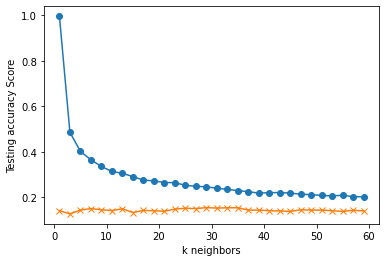

In [30]:

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train, y_train)
print('k=43 Test Acc: %.3f' % knn.score(X_test, y_test))

C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k=43 Test Acc: 0.140


In [32]:
print(f"Training Data Score: {knn.score(X_train, y_train)}")
print(f"Testing Data Score: {knn.score(X_test, y_test)}")

Training Data Score: 0.22070645554202192
Testing Data Score: 0.14024835646457268


In [33]:
knn.predict(X_test)[:10]

array([ 75000,  55000, 105000,  65000,  65000,  95000,  95000,  95000,
        85000,  35000])

In [13]:
knn.predict_proba(X_test)[:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.04761905, 0.19047619, 0.        ,
        0.14285714, 0.23809524, 0.04761905, 0.0952381 , 0.14285714,
        0.0952381 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.04761905, 0.        , 0.04761905,
        0.        , 0.28571429, 0.28571429, 0.0952381 , 0.23809524,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.0952381 ,
        0.0952381 , 0.04761905, 0.0952381 , 0.14285714, 0.04761905,
        0.19047619, 0.14285714, 0.0952381 , 0.04761905, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [34]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 1, Train/Test Score: 0.995/0.174


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 3, Train/Test Score: 0.490/0.134


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 5, Train/Test Score: 0.418/0.149


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 7, Train/Test Score: 0.383/0.158


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 9, Train/Test Score: 0.351/0.175


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 11, Train/Test Score: 0.334/0.175


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 13, Train/Test Score: 0.322/0.175


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 15, Train/Test Score: 0.306/0.175


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 17, Train/Test Score: 0.304/0.181


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 19, Train/Test Score: 0.297/0.173


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 21, Train/Test Score: 0.290/0.171


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 23, Train/Test Score: 0.284/0.178


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 25, Train/Test Score: 0.279/0.187


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 27, Train/Test Score: 0.277/0.190


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 29, Train/Test Score: 0.279/0.187


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 31, Train/Test Score: 0.273/0.185


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 33, Train/Test Score: 0.269/0.181


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 35, Train/Test Score: 0.267/0.180


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 37, Train/Test Score: 0.260/0.184


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 39, Train/Test Score: 0.253/0.183


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 41, Train/Test Score: 0.254/0.183


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 43, Train/Test Score: 0.251/0.190


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 45, Train/Test Score: 0.250/0.181


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 47, Train/Test Score: 0.250/0.169


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 49, Train/Test Score: 0.248/0.178


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 51, Train/Test Score: 0.247/0.182


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 53, Train/Test Score: 0.245/0.178


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 55, Train/Test Score: 0.241/0.178


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 57, Train/Test Score: 0.238/0.175


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k: 59, Train/Test Score: 0.237/0.170


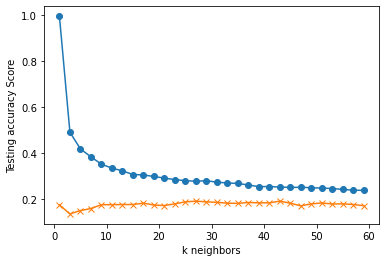

In [35]:

# Create the KNN Model
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [36]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.23678440925700364
Testing Data Score: 0.1701972242512783


In [37]:
knn.predict(X_test_scaled)[:10]

array([ 75000,  65000,  95000,  65000,  75000,  15000,  65000, 105000,
       105000,  55000])

In [38]:
knn.predict_proba(X_test)[:10]

array([[0.05084746, 0.01694915, 0.        , 0.        , 0.        ,
        0.        , 0.01694915, 0.10169492, 0.20338983, 0.11864407,
        0.13559322, 0.08474576, 0.06779661, 0.06779661, 0.01694915,
        0.03389831, 0.01694915, 0.01694915, 0.01694915, 0.03389831,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.05084746, 0.01694915, 0.        , 0.01694915, 0.01694915,
        0.        , 0.11864407, 0.03389831, 0.13559322, 0.11864407,
        0.05084746, 0.13559322, 0.06779661, 0.08474576, 0.03389831,
        0.03389831, 0.01694915, 0.03389831, 0.01694915, 0.01694915,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01694915, 0.01694915, 0.01694915, 0.01694915, 0.01694915,
        0.        , 0.05084746, 0.08474576, 0.10169492, 0.03389831,
        0.13559322, 0.13559322, 0.11864407, 0.10169492, 0.01694915,
        0.06779661, 0.03389831, 0.        , 0.01694915, 0.        ,
        0.01694915, 0.        , 0.        , 0.

In [39]:
k_range = list(range(1, 60, 2))
print(k_range)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59]


In [40]:
param_grid = dict(n_neighbors=k_range, weights = ['uniform', 'distance'], metric =['euclidean','manhattan'] )
print(param_grid)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [41]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, verbose =1, cv = 10, n_jobs = -1)

In [42]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 10.6min finished
C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=59), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [43]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'metric': 'euclidean', 'n_neighbors': 29, 'weights': 'distance'}
0.19561450359029137
KNeighborsClassifier(metric='euclidean', n_neighbors=29, weights='distance')


In [44]:
print(f"Training Grid Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Grid Score: {grid.score(X_test_scaled, y_test)}")

Training Grid Score: 0.9951278928136419
Testing Grid Score: 0.18261504747991233


In [45]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [46]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        5000       1.00      0.07      0.13        14
       15000       0.41      0.43      0.42        28
       25000       0.37      0.22      0.27        32
       35000       0.22      0.10      0.14        48
       45000       0.15      0.12      0.13        66
       55000       0.17      0.14      0.15        90
       65000       0.22      0.31      0.26       139
       75000       0.14      0.12      0.13       130
       85000       0.18      0.26      0.21       148
       95000       0.19      0.23      0.21       156
      105000       0.17      0.25      0.21       145
      115000       0.16      0.13      0.15       119
      125000       0.12      0.11      0.12        92
      135000       0.18      0.13      0.15        63
      145000       0.00      0.00      0.00        36
      155000       0.00      0.00      0.00        25
      165000       0.00      0.00      0.00        14
      175000       0.00    

C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
